In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
energy = pd.read_csv("pjm_hourly_est.csv")
energy.index = energy.Datetime
energy = energy[['PJM_Load']]
energy.head()

,PJM_Load
Datetime,
1998-12-31 01:00:00,29309.0
1998-12-31 02:00:00,28236.0
1998-12-31 03:00:00,27692.0
1998-12-31 04:00:00,27596.0
1998-12-31 05:00:00,27888.0


In [34]:
energy.describe()

,PJM_Load
count,32896.000000
mean,29766.427408
std,5849.769954
min,17461.000000
25%,25473.000000
50%,29655.000000
75%,33073.250000
max,54030.000000


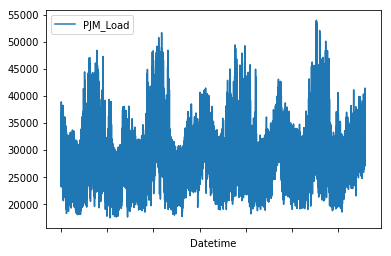

In [35]:
energy.plot()

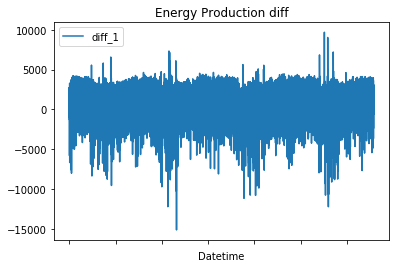

In [37]:
energy['diff_1'] = energy.PJM_Load - energy.PJM_Load.shift()
energy.plot(y='diff_1')
plt.title('Energy Production diff')
plt.show()

Text(0.5, 1.0, 'Energy Production PACF')

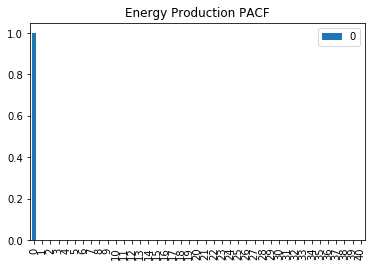

In [38]:
from statsmodels.tsa.stattools import pacf

x_acf = pd.DataFrame(pacf(energy.PJM_Load))
x_acf.plot(kind='bar')
plt.title("Energy Production PACF")

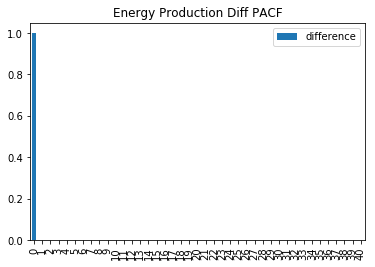

In [39]:
x_acf = pd.DataFrame(pacf(energy.diff_1[1:]))
x_acf.plot(kind='bar')
plt.title("Energy Production Diff PACF")
plt.legend(['difference'])

In [40]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(energy.PJM_Load, order=(0,1,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:             D.PJM_Load   No. Observations:               178261
Model:                 ARIMA(0, 1, 0)   Log Likelihood                     nan
Method:                           css   S.D. of innovations                nan
Date:                Sun, 15 Sep 2019   AIC                                nan
Time:                        22:59:58   BIC                                nan
Sample:                             1   HQIC                               nan
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan        nan        nan        nan         nan         nan
Residuals Description
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
dtype

/Users/nickdelucchi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/nickdelucchi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/nickdelucchi/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

/Users/nickdelucchi/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning:

Using a non-tuple sequence for multidimensional in

In [45]:
model = ARIMA(energy.PJM_Load, order=(0,1,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:             D.PJM_Load   No. Observations:               178261
Model:                 ARIMA(0, 1, 0)   Log Likelihood                     nan
Method:                           css   S.D. of innovations                nan
Date:                Sun, 15 Sep 2019   AIC                                nan
Time:                        23:01:20   BIC                                nan
Sample:                             1   HQIC                               nan
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan        nan        nan        nan         nan         nan
Residuals Description
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
dtype

/Users/nickdelucchi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/nickdelucchi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/nickdelucchi/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

/Users/nickdelucchi/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning:

Using a non-tuple sequence for multidimensional in